# Séance 7

## Objectif de la séance

- Synthétiser tout ce qui a été appris durant les séances précédentes en résolvant un exercice récapitulatif

In [19]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of HELMo Gramme

import warnings
warnings.filterwarnings("ignore", category=PendingDeprecationWarning) # Pour ignorer des message d'avertissement inutiles

## Exercices récapitulatifs

### Exercice type examen

Soit le système asservi à retour unitaire suivant:

:::{image} ../images/7_exerciceExamen.png
:align: center
:::

#### I.

Donnez les caractéristiques de performances typiques associées à sa réponse en boucle fermée si K=20.

(Précisez les relations, abaques et/ou calculs pour les obtenir **ET** vous validerez vos résultats à l’aide de 
l’affichage des réponses ad hoc via Python)

:::{toggle}
Mise sous forme canonique de la fonction de transfert du système en boucle ouverte:

$$H_{BO} = \frac{\frac{2}{5}K}{p*(\frac{2}{5}p+1)}$$

Et voici la forme canonique de la fonction de transfert du système en boucle fermée:

$$H_{BF} = \frac{1}{\frac{1}{K}p^2+\frac{5}{2K}p+1}$$

:::

In [32]:
# ------------------------
# Configuration du système
# ------------------------

# Système initial
K = 20
num = 2*K
H1 = ml.tf(1, [1, 0])
H2 = ml.tf(1, [2, 5])
H = num*H1*H2  # H de l'énoncé
G_BF_init = ml.feedback(H, 1)

# Caractéristiques typiques
w, zetas, poles = ml.damp(G_BF_init, doprint=False)
print(f"Les caractéristiques de performances typiques associées à sa réponse en boucle fermée sont : Wn={w[1]:.3f} rad/s zeta={zetas[1]:.3f}.")

Les caractéristiques de performances typiques associées à sa réponse en boucle fermée sont : Wn=4.472 rad/s zeta=0.280.


- Erreur si le système est excité par une entrée de type échelon :

C:\Users\P150077\Anaconda3\envs\Regu\lib\site-packages\control\statesp.py:103: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  arr = np.matrix(data, dtype=float)


L'erreur de position vaut -0.0%.


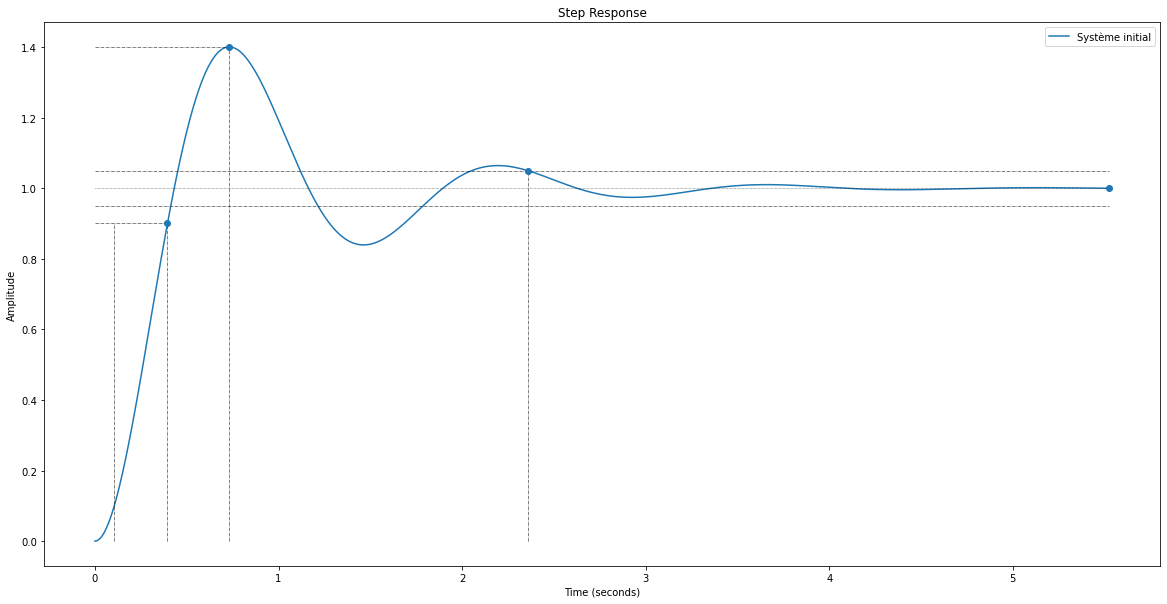

In [191]:
fig = plt.figure("Step Response",figsize=(20,10))
info = rlf.stepWithInfo(G_BF_init, NameOfFigure="Step Response", sysName='Système initial')
print(f"L'erreur de position vaut {(1-info.DCGain)*100:.1f}%.")

- Erreur si le système est excité par une entrée de type rampe :


L'erreur de vitesse du système vaut 12.50%.


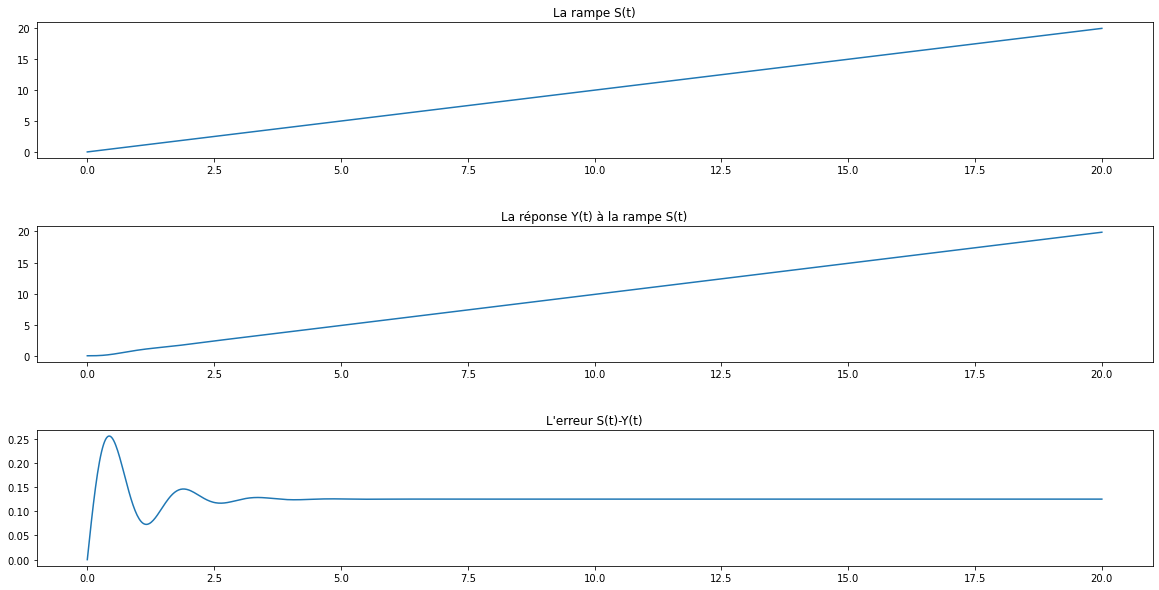

In [22]:
t = np.linspace(0, 20, 1000)
s = t
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
[y, t, xout] = ml.lsim(G_BF_init,s,t) # Simuler la réponse à une rampe => erreur de vitesse
warnings.filterwarnings('default') # Pour réactiver les warnings

plt.figure("Erreur de vitesse",figsize=(20,10))
plt.subplot(3,1,1); plt.plot(t,s); plt.title("La rampe S(t)")
plt.subplot(3,1,2); plt.plot(t,y); plt.title("La réponse Y(t) à la rampe S(t)")
plt.subplot(3,1,3); plt.plot(t,(s-y)); plt.title("L'erreur S(t)-Y(t)")
plt.subplots_adjust(hspace=0.5) # Pour laisser un peu d'espace pour les titres

ev = s[-1] - y[-1] # Erreur de vitesse système original

print(f"\nL'erreur de vitesse du système vaut {ev*100:.2f}%.")

- Temps de réponse à 5% si le système est excité par une entrée de type échelon :

In [25]:
print(f"Le temps de réponse à 5% vaut {info.SettlingTime:.3f}s.")

Le temps de réponse à 5% vaut 2.357s.


- Amplitude en valeur absolue et instant du premier dépassement si le système est excité par une entrée de type échelon qui passe de 1 V à 3 V afin de vérifier si une tension d’alimentation de 5 V est possible :

L'amplitude du premier dépassement vaut 3.801 (->26.701%) et apparaît à 0.733s.
Cette amplitude étant inférieure à 5, une alimentation de 5V sera donc suffisante.



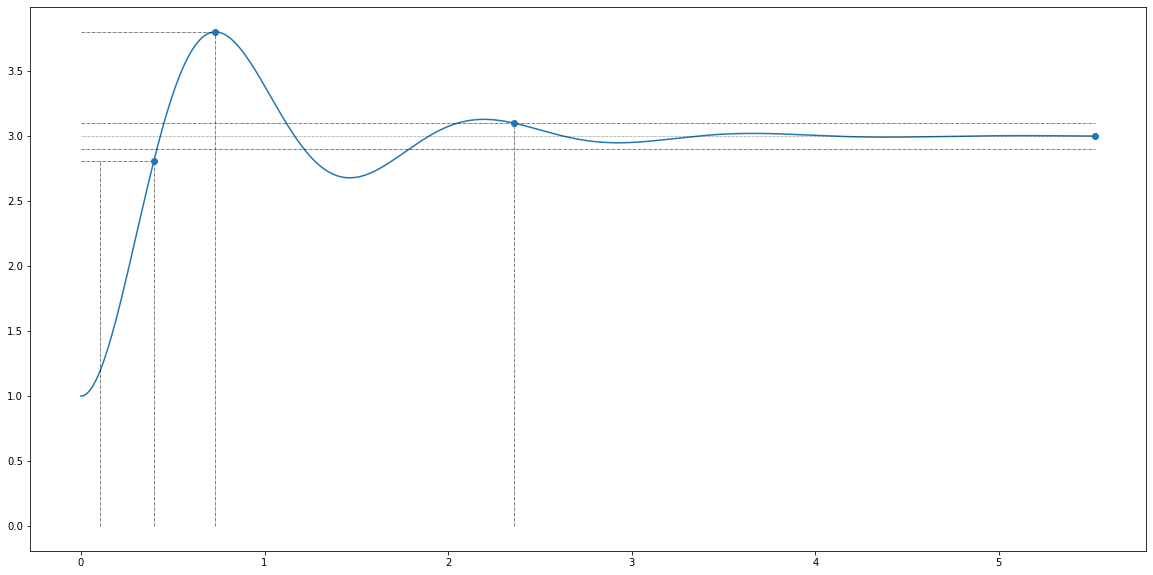

In [193]:
# Création de la fenêtre à une taille donnée
fig = plt.figure("Step 1 -> 3",figsize=(20,10))

warnings.filterwarnings('ignore') # Pour éviter d'afficher un message d'erreur inutile
peak, peakTime, yout, t = rlf.stepFromTo(G_BF_init, 1, 3, focus=True)
warnings.resetwarnings() # Pour réactiver l'affichage d'erreurs
info = rlf.step_info(yout, t)
print(f"L'amplitude du premier dépassement vaut {info.Peak:.3f} (->{info.Overshoot:.3f}%) et apparaît à {info.PeakTime:.3f}s.")
print("Cette amplitude étant inférieure à 5, une alimentation de 5V sera donc suffisante.\n")

#### II.

Proposez un choix de valeurs pour les paramètres et donc pour K qui permette de respecter une marge de phase de 60° et vérifiez que dans ces conditions, le dépassement est bien ramené inférieur à 20 % :

Gain à -120° = -12.396689184358634 dB
Fréquence à -120° = 1.4434971860142058 rad/sec
K = 4.16710514923329
Si K = 4.167, la marge de phase vaut 60.00° comme demandé.
Si K = 4.167, le dépassement relatif vaut 8.721%, soit bien moins que les 20% tolérés.


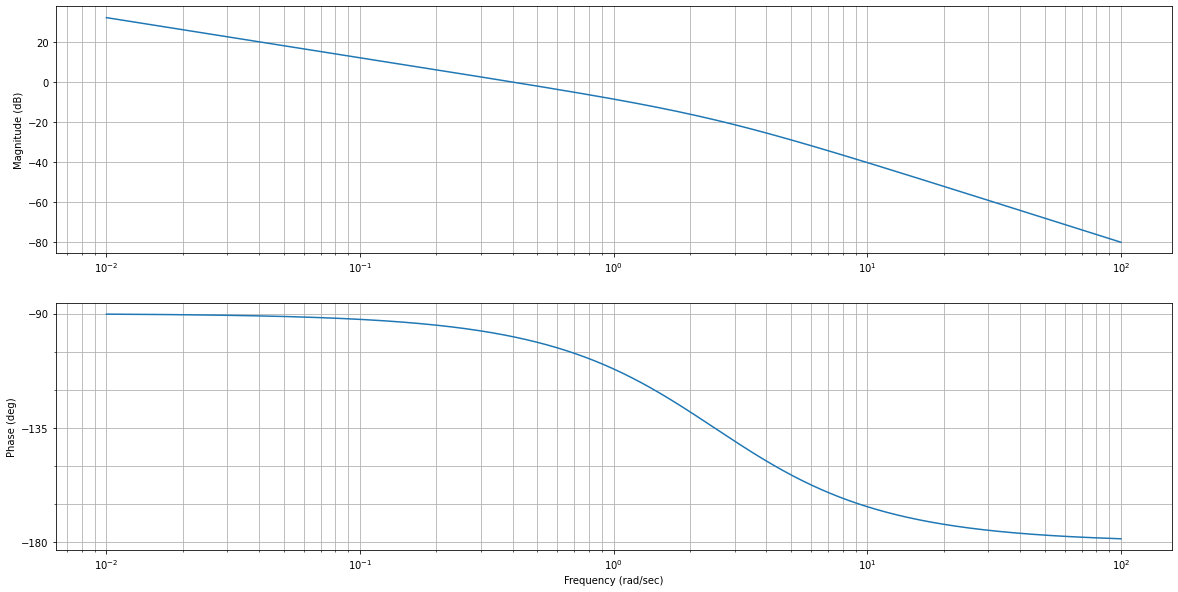

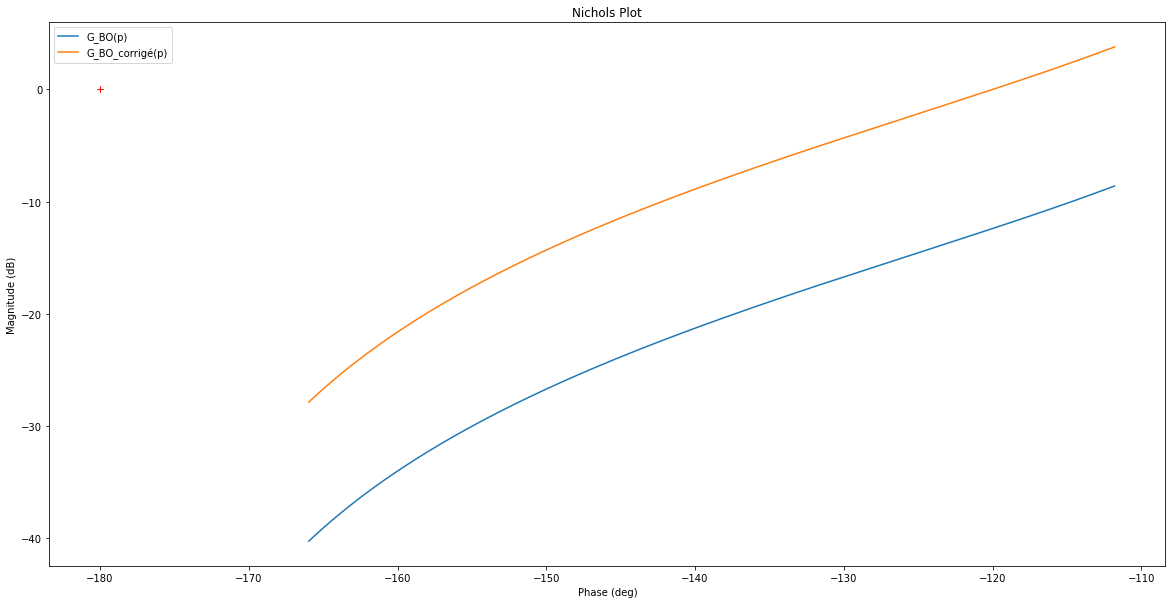

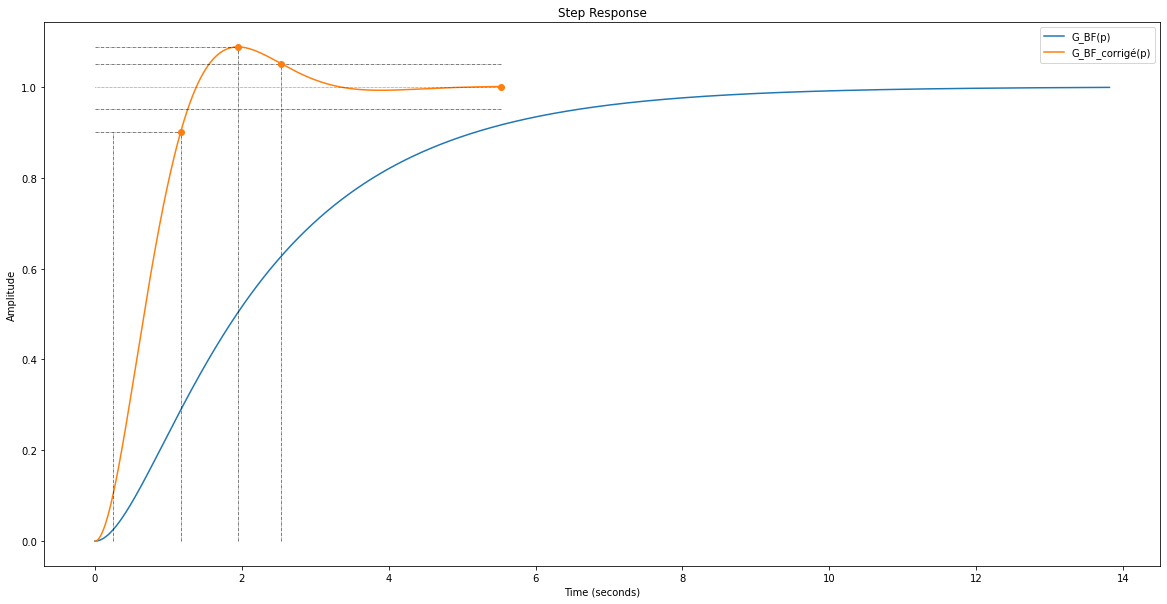

In [49]:
# Système sans K
num = 2
H1 = ml.tf(1, [1, 0])
H2 = ml.tf(1, [2, 5])
G_BO = num*H1*H2
G_BF = ml.feedback(G_BO, 1)

# Lecture phase
fig = plt.figure("Bode",figsize=(20,10))
mag, w = rlf.getValues(G_BO, -180+60, printValue=True, NameOfFigure="Bode")
K = 1/mag  # K va à l'inverse de ce qu'on mesure
print("K =", K)

# Système avec K
G_BO_K = K*G_BO
G_BF_K = ml.feedback(G_BO_K, 1)

# Vérifications
# -------------

# Nichols
fig = plt.figure("Nichols", figsize=(20,10))
#frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols")
rlf.nichols(G_BO_K, labels=['G_BO_corrigé(p)'], NameOfFigure = "Nichols")
mg, mp, __, __ = ml.margin(G_BO_K)
print(f"Si K = {K:.3f}, la marge de phase vaut {mp:.2f}° comme demandé.")

# Réponse indicielle
fig = plt.figure("Steps", figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
rlf.step_(G_BF, NameOfFigure="Steps", sysName='G_BF(p)')
info_K = rlf.stepWithInfo(G_BF_K, NameOfFigure="Steps", sysName='G_BF_corrigé(p)')
warnings.filterwarnings('default') # Pour réactiver les warnings

print(f"Si K = {K:.3f}, le dépassement relatif vaut {info_K.Overshoot:.3f}%, soit bien moins que les 20% tolérés.")


#### III.

Dimensionnez un correcteur qui permette d’assurer une erreur de vitesse limitée à 1 % (tout en garantissant que le dépassement reste limité à 20 % pour la réponse indicielle) :

- Type de correcteur : P, PI, PD ou PID ?

:::{toggle}
Nous avons un système de classe 1, on sait donc que son erreur de vitesse vaut $\frac{1}{K_{BO}}$ (*cf. p. 6-3*). Dès lors, un simple correcteur P devrait à priori suffire.
:::

- Dimensionnement :

:::{toggle}
- Correcteur P:

$$
\frac{1}{K_{BO}} = 0.01 \Leftrightarrow \frac{1}{\frac{2}{5}*K} = 0.01 \Leftrightarrow K = 250
$$

Vérification:
:::

Si K = 250.000, le dépassement relatif vaut 78.052%, soit bien plus que les 20% tolérés.

L'erreur de vitesse du système vaut 1.00%.


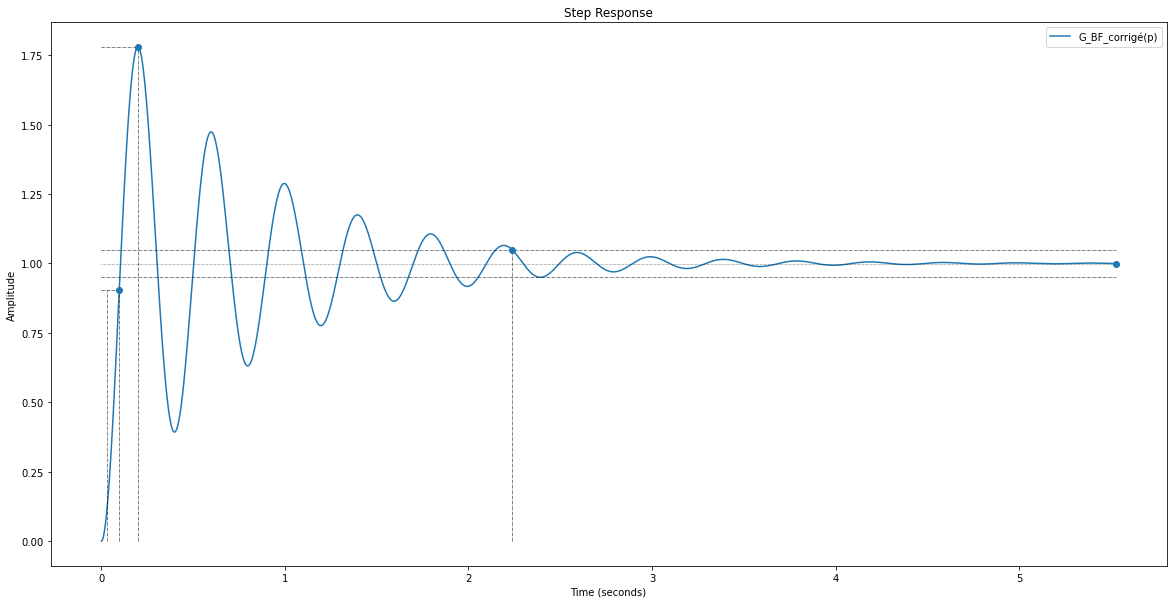

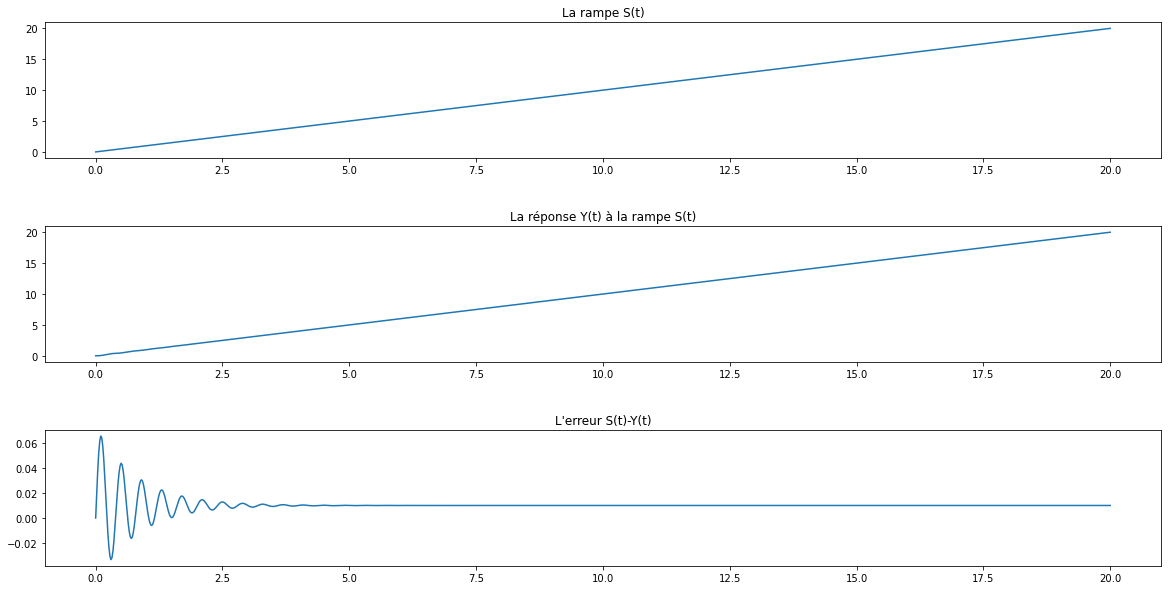

In [64]:
# Système avec K = 250
K = 250
G_BO_K = K*G_BO
G_BF_K = ml.feedback(G_BO_K, 1)

# Réponse indicielle
fig = plt.figure("Steps", figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
info_K = rlf.stepWithInfo(G_BF_K, NameOfFigure="Steps", sysName='G_BF_corrigé(p)')
warnings.filterwarnings('default') # Pour réactiver les warnings

print(f"Si K = {K:.3f}, le dépassement relatif vaut {info_K.Overshoot:.3f}%, soit bien plus que les 20% tolérés.")

# Erreur de vitesse
t = np.linspace(0, 20, 1000)
s = t
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
[y, t, xout] = ml.lsim(G_BF_K,s,t) # Simuler la réponse à une rampe => erreur de vitesse
warnings.filterwarnings('default') # Pour réactiver les warnings

plt.figure("Erreur de vitesse",figsize=(20,10))
plt.subplot(3,1,1); plt.plot(t,s); plt.title("La rampe S(t)")
plt.subplot(3,1,2); plt.plot(t,y); plt.title("La réponse Y(t) à la rampe S(t)")
plt.subplot(3,1,3); plt.plot(t,(s-y)); plt.title("L'erreur S(t)-Y(t)")
plt.subplots_adjust(hspace=0.5) # Pour laisser un peu d'espace pour les titres

ev = s[-1] - y[-1] # Erreur de vitesse système original

print(f"\nL'erreur de vitesse du système vaut {ev*100:.2f}%.")

:::{toggle}
Un correcteur P n'est donc pas suffisant vu que le dépassement engendré par celui-ci est supérieur aux 20% tolérés. Ils nous reste donc 3 autres correcteurs diponibles (PI, PD, PID). 

Un correcteur PI n'aurait pas d'intérêt puisqu'il augmenterait la classe de notre système ce qui nous arrangerait au niveau de l'erreur de vitesse qui serait pas conséquent nulle (*cf. p. 6-3*) mais engendrerait un système moins stable, ce qui nous amènerait à prendre un K plus faible pour contrer cet effet néfaste (*cf. p. 7-7*) et nous obtiendrions du coup un système plus précis que ce qui est réclamé mais plus lent...

Un correcteur PD, par contre, aurait l'avantage d'améliorer la stabilité (*cf. p. 7-13*) du système et donc de diminuer ce dépassement. Nous allons donc choisir de dimensionner ce correcteur qui peut être dimensionné de deux manières:

- **Compensation du pôle dominant:**

  Il s'agit ici de la solution la plus simple puisque la fonction de transfert de notre système en boucle ouverte ne possède qu'un seul pôle lié à une constante de temps: *(2p+5)*. Dès lors, il suffit de fixer $\tau_D=\frac{2}{5}$ et nous nous retrouverons avec un système du premier ordre qui a l'avantage de ne présenter aucun dépassement! Nous nous retrouverons donc avec un système présentant une erreur de vitesse de 1% et un dépassement relatif nul.
:::

Si K = 250.000 et tau_D = 0.4s, le dépassement relatif vaut 0.000%, soit bien moins que les 20% tolérés.

L'erreur de vitesse du système vaut 1.00%.


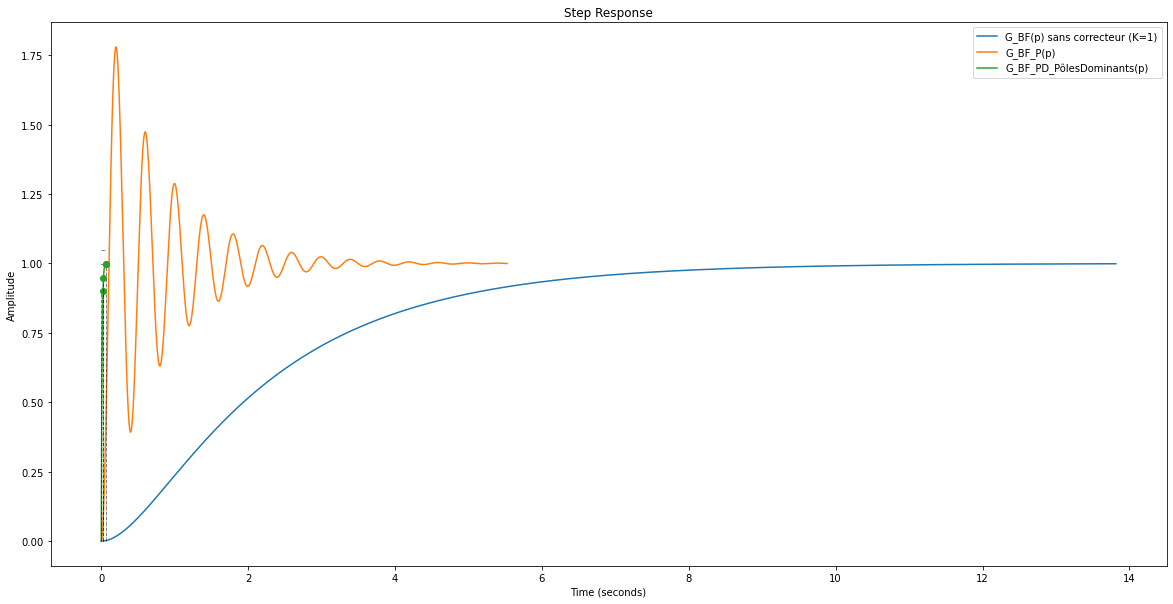

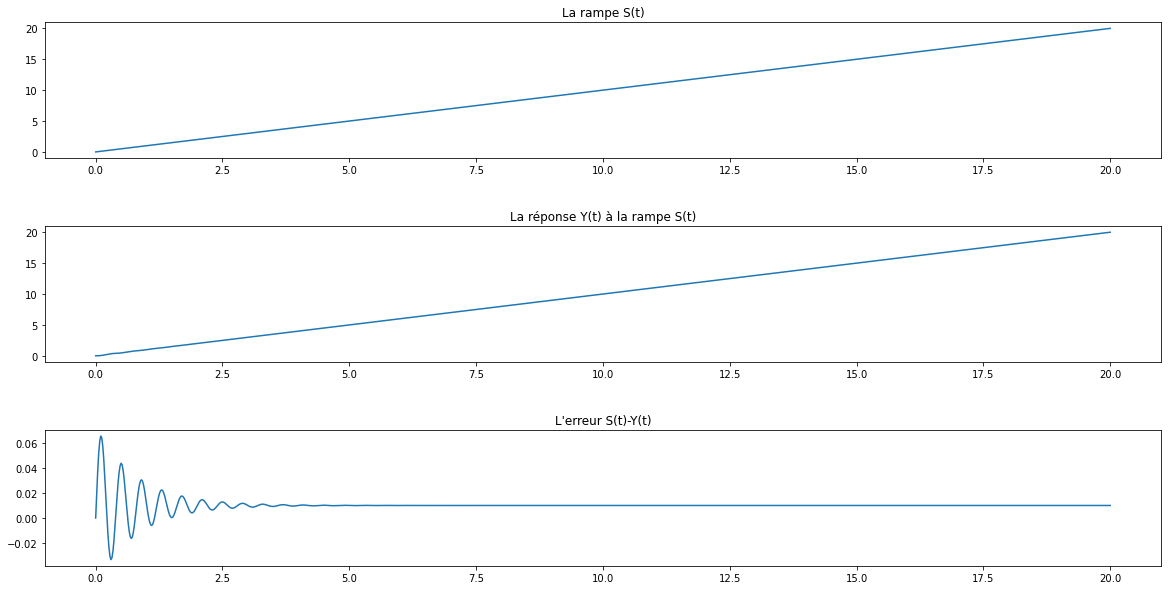

In [123]:
tD = 2/5
C_PD = K*ml.tf([tD, 1],1)

G_BO_PD = C_PD*G_BO
G_BF_PD = ml.feedback(G_BO_PD,1)

fig = plt.figure("Steps",figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
rlf.step_(G_BF, NameOfFigure="Steps", sysName='G_BF(p) sans correcteur (K=1)')
rlf.step_(G_BF_K, NameOfFigure="Steps", sysName='G_BF_P(p)')
info_PD = rlf.stepWithInfo(G_BF_PD, NameOfFigure="Steps", sysName='G_BF_PD_PôlesDominants(p)') # Renvoie toutes les infos du step
warnings.filterwarnings('default') # Pour réactiver les warnings

print(f"Si K = {K:.3f} et tau_D = {tD:.1f}s, le dépassement relatif vaut {info_PD.Overshoot:.3f}%, soit bien moins que les 20% tolérés.")

# Erreur de vitesse
t = np.linspace(0, 20, 1000)
s = t
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
[y, t, xout] = ml.lsim(G_BF_K,s,t) # Simuler la réponse à une rampe => erreur de vitesse
warnings.filterwarnings('default') # Pour réactiver les warnings

plt.figure("Erreur de vitesse",figsize=(20,10))
plt.subplot(3,1,1); plt.plot(t,s); plt.title("La rampe S(t)")
plt.subplot(3,1,2); plt.plot(t,y); plt.title("La réponse Y(t) à la rampe S(t)")
plt.subplot(3,1,3); plt.plot(t,(s-y)); plt.title("L'erreur S(t)-Y(t)")
plt.subplots_adjust(hspace=0.5) # Pour laisser un peu d'espace pour les titres

ev = s[-1] - y[-1] # Erreur de vitesse système original

print(f"\nL'erreur de vitesse du système vaut {ev*100:.2f}%.")

:::{toggle}
- **Placement fréquentiel:**

  L'avantage de cette solution est qu'elle nous permet de trouver (par essais-erreurs) un système qui présenterait pile un dépassement 20% tout en garantissant une erreur de vitesse de 1%. Nous allons tout de même voir ici ce que le choix de cette technique entraînerait comme résultat et nous le comparerons à ce que nous avons obtenu via la technique de compensation du pôle dominant.
:::

Si K = 250.000, la marge de phase vaut 9.04°.
Si nous chercher à obtenir une marge de phase de 84.960°, nous relevons un w_c de 149.251 rad/s => tau_D = 0.067s.
Le système ainsi corrigé présente une marge de phase de 60.95° et une marge de gain de inf dB.
Si K = 250.000 et tau_D = 0.067s, le dépassement relatif vaut 19.978%, soit juste un peu moins que les 20% tolérés.


Observons la différences de résultats entre les deux techniques:

Système corrigé par compensation du pôle dominant
-------------------------------------------------
DCGain : 0.9990000000000984
Overshoot : 0.0
Peak : 0.9990000000000984
PeakTime : 0.06907755278982136
RiseTime : 0.021885957319547362
SettlingTime : 0.02976849434656868

Système corrigé par placement fréquentiel
-----------------------------------------
DCGain : 1.001144928984236
Overshoot : 19.978403441266444
Peak : 1.2011577019284871
PeakTime : 0.15711534614817588
RiseTime : 0.06438212219959513
SettlingTime : 0.27819967184574224


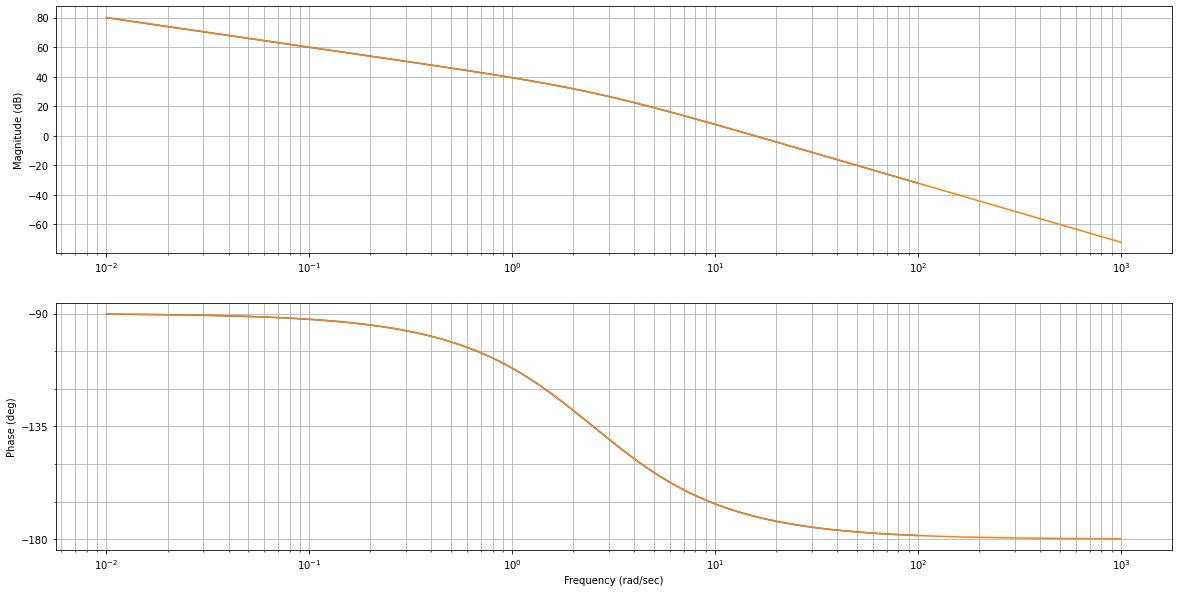

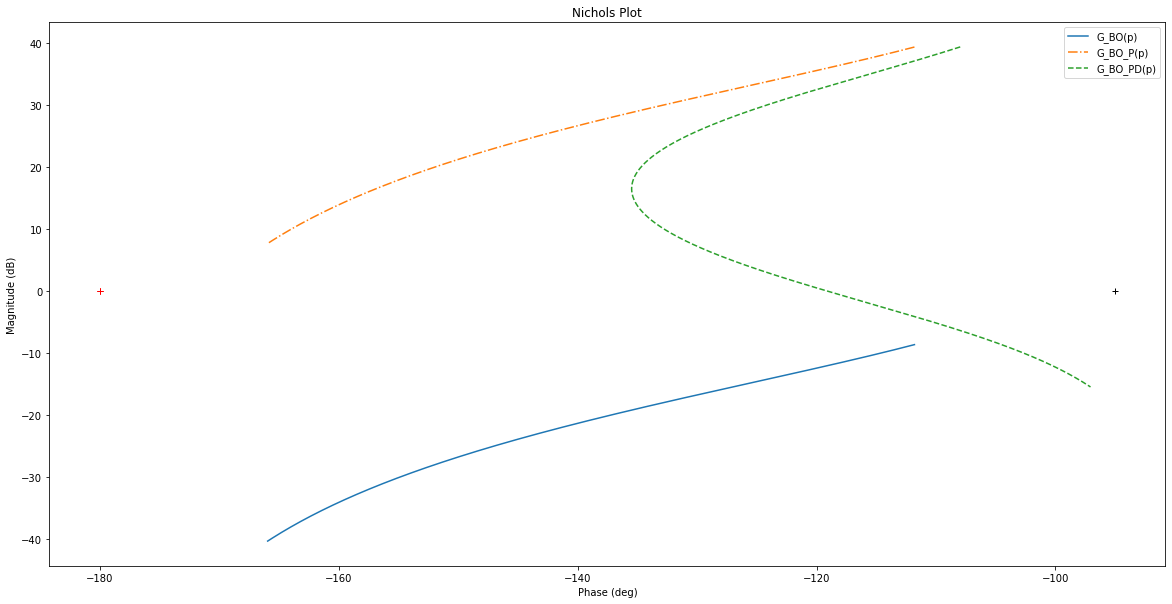

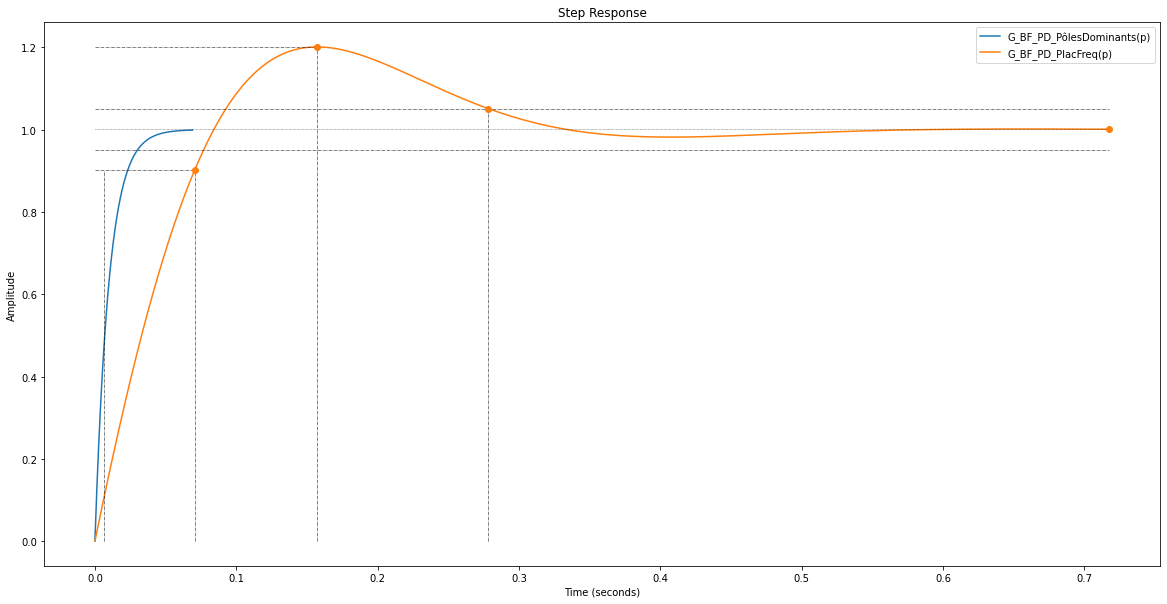

In [127]:
MP = 84.96

# Lecture phase
mg, mp, __, __ = ml.margin(G_BO_K)
print(f"Si K = {K:.3f}, la marge de phase vaut {mp:.2f}°.")

fig = plt.figure("Bode",figsize=(20,10))
mag, w = rlf.getValues(G_BO_K, -180+MP-84, printValue=False, NameOfFigure="Bode")

# tD
tD = 10/w # = tD conseillé
print(f"Si nous cherchons à obtenir une marge de phase de {MP:.3f}°, nous relevons un w_c de {w:.3f} rad/s => tau_D = {tD:.3f}s.")
Corr = K*ml.tf([tD, 1],1)
G_BO_PD_freq = Corr*G_BO

fig = plt.figure("Nichols",figsize=(20,10))
ax = fig.subplots()
rlf.nichols(G_BO, grid = False, labels=['G_BO(p)'], NameOfFigure = "Nichols")
rlf.nichols(G_BO_K, grid = False, labels=['G_BO_P(p)'], NameOfFigure = "Nichols", linestyle = '-.')
#rlf.nichols(G_BO_PD, grid = False, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '--')
rlf.nichols(G_BO_PD_freq, grid = False, labels=['G_BO_PD(p)'], NameOfFigure = "Nichols", linestyle = '--')

ax.plot(-180+MP, 0,'k+'); # Ajout du repère (+) par lequel on est censé passer

gm, pm, wg, wp = ml.margin(G_BO_PD_freq) # Extrait la marge de gain (Gm) et de phase (Pm)
print(f"Le système ainsi corrigé présente une marge de phase de {pm:.2f}° et une marge de gain de {gm:.2f} dB.")

# Step
# ----
G_BF_PD_freq = ml.feedback(G_BO_PD_freq,1)

fig = plt.figure("Steps",figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
#rlf.step_(G_BF, NameOfFigure="Steps", sysName='G_BF(p) sans correcteur (K=1)')
#rlf.step_(G_BF_K, NameOfFigure="Steps", sysName='G_BF_P(p)')
rlf.step_(G_BF_PD, NameOfFigure="Steps", sysName='G_BF_PD_PôlesDominants(p)')
info_PD_freq = rlf.stepWithInfo(G_BF_PD_freq, NameOfFigure="Steps", sysName='G_BF_PD_PlacFreq(p)') # Renvoie toutes les infos du step
warnings.filterwarnings('default') # Pour réactiver les warnings

print(f"Si K = {K:.3f} et tau_D = {tD:.3f}s, le dépassement relatif vaut {info_PD_freq.Overshoot:.3f}%, soit juste un peu moins que les 20% tolérés.")

print("\n\nObservons la différence de résultats entre les deux techniques:")

print("\nSystème corrigé par compensation du pôle dominant")
print("-------------------------------------------------")
rlf.printInfo(info_PD)

print("\nSystème corrigé par placement fréquentiel")
print("-----------------------------------------")
rlf.printInfo(info_PD_freq)

:::{toggle}
On remarque que la technique de compensation du pôle dominant est ici la plus efficace et ce, à tous les niveaux (facilitié de dimensionnement, rapidité et stabilité du système).

De plus, nous observons qu'**un correcteur PID n'est pas nécessaire puisqu'un correcteur PD suffit pour corriger ce système** afin qu'il présente une erreur de vitesse de 1% et un dépassement inférieur à 20%. Nous nous limiterons donc au correcteur PD dimensionné via la technique de compensation du pôle dominant.
:::

:::{toggle}

**Preuves qu'il ne vaudrait pas mieux choisir un PI:**

- **Via la technique de compensation du pôle dominant**

  Le problème avec cette technique est qu'elle rend le système purement instable vu qu'on se retrouve avec un double pôle à l'origine sans autre pôle lié à une constante de temps. Le système présente donc un déphasage de -180° pour toute fréquence et passe donc par le point d'instabilité (0 dB, -180°).
  
  Voici ce qu'on obtient si $\tau_I=\frac{2}{5}$:
:::

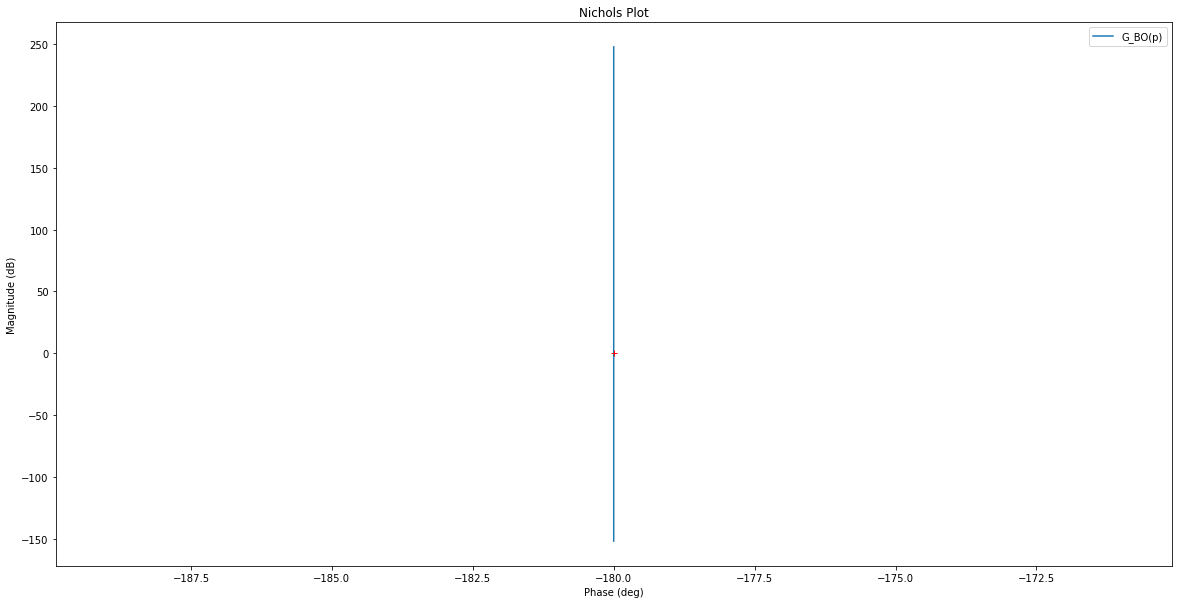

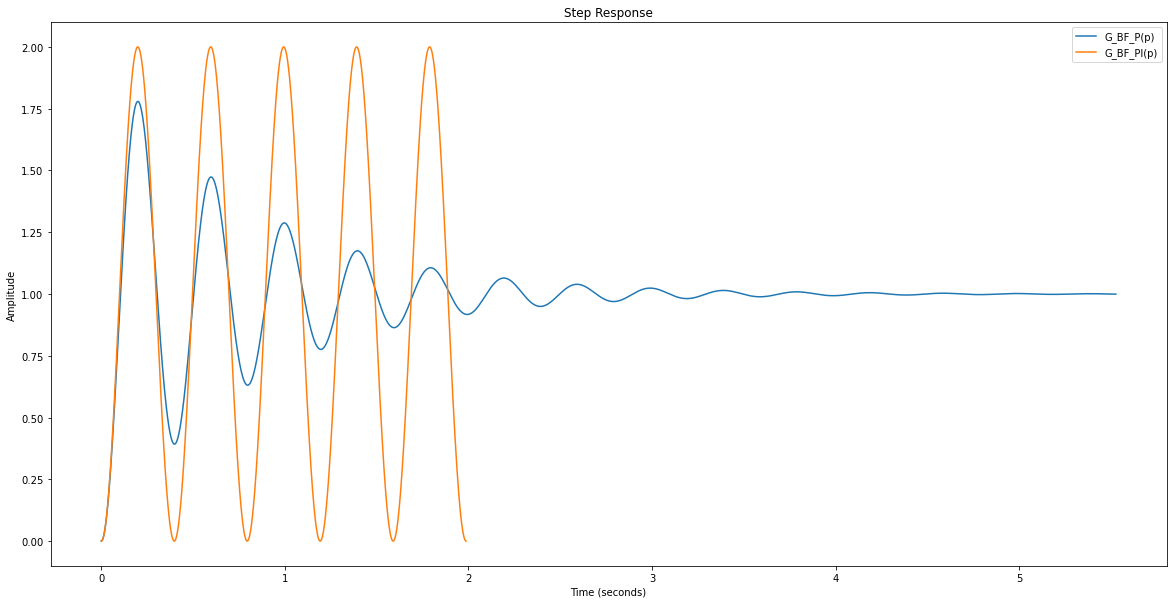

In [189]:
G_BO_PI = ml.tf(250, [1, 0, 0])
fig = plt.figure("Nichols - Pôles dominants", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO_PI, labels=['G_BO(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)

G_BF_PI = ml.feedback(G_BO_PI, 1)
fig = plt.figure("Steps - Pôles dominants", figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
rlf.step_(G_BF_K, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_P(p)')
rlf.step_(G_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_PI(p)')
warnings.filterwarnings('default') # Pour réactiver les warnings

:::{toggle}
- **Via la technique du placement fréquentiel**

  Qui est donc la seule technique utilisable pour dimensionner un correcteur PI pour ce système pour les raisons expliquées au point précédent.
:::

Si K = 2.000, la marge de phase vaut 9.04°.
Si nous cherchons à obtenir une marge de phase de 85.000°, nous relevons un w_c de 143.191 rad/s => tau_I = 4.889s (facteur multiplicatif d'1/w_c = 700).
Marge de phase du système original corrigé avec K = 72.986°
Marge de phase du système original corrigé par un correcteur PI = 57.952°
Dépassement du système original corrigé par un correcteur PI = 19.664%

L'erreur de vitesse du système vaut 0.00%.


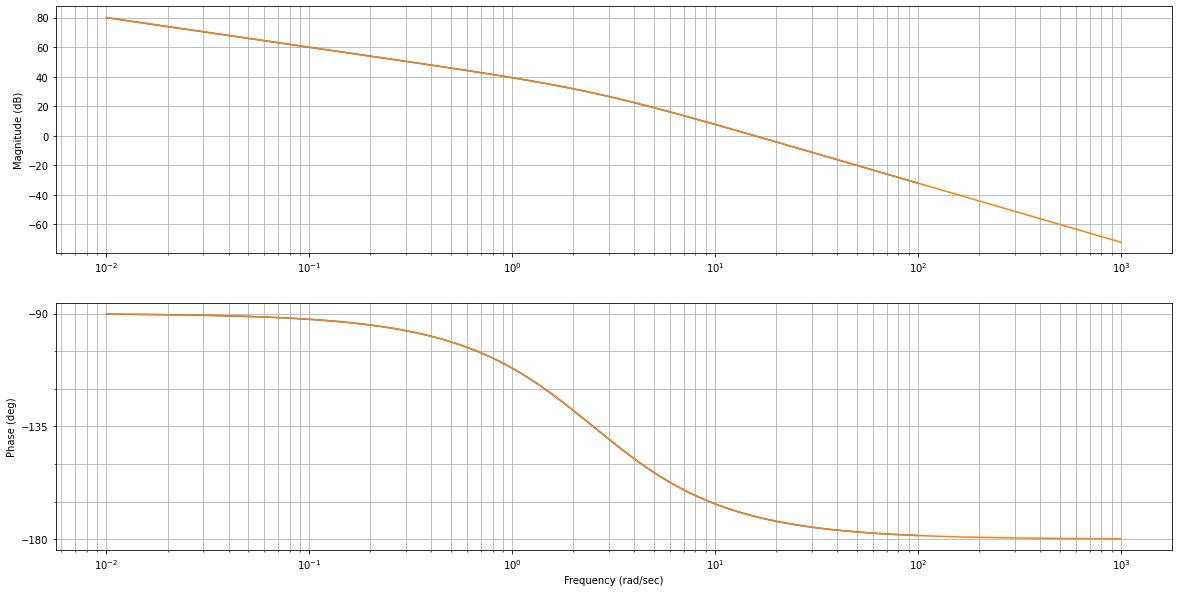

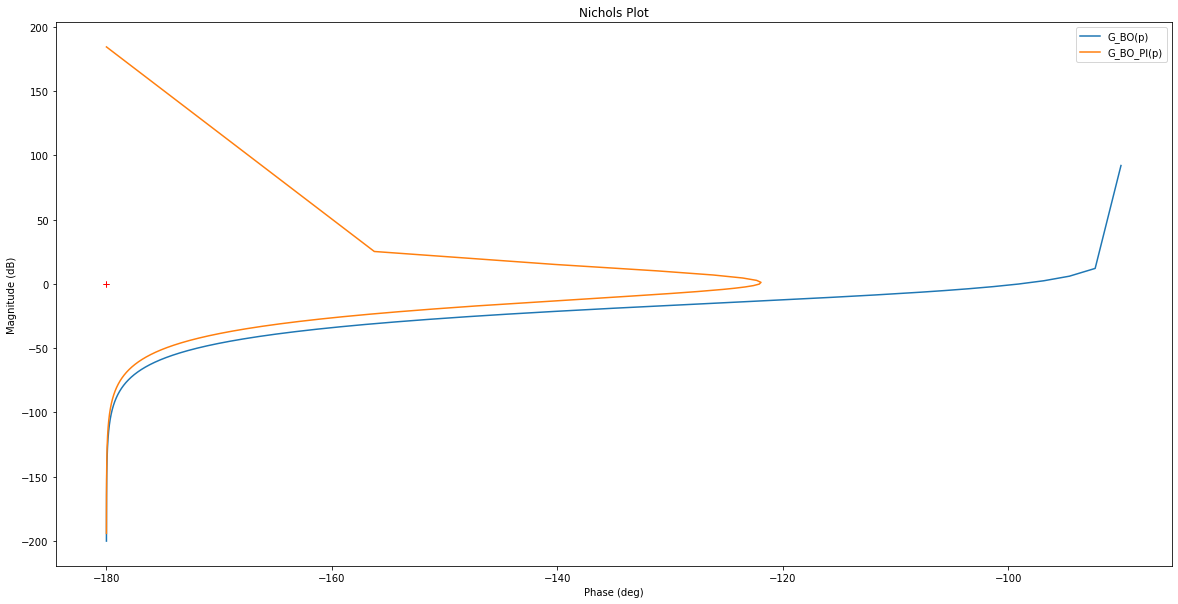

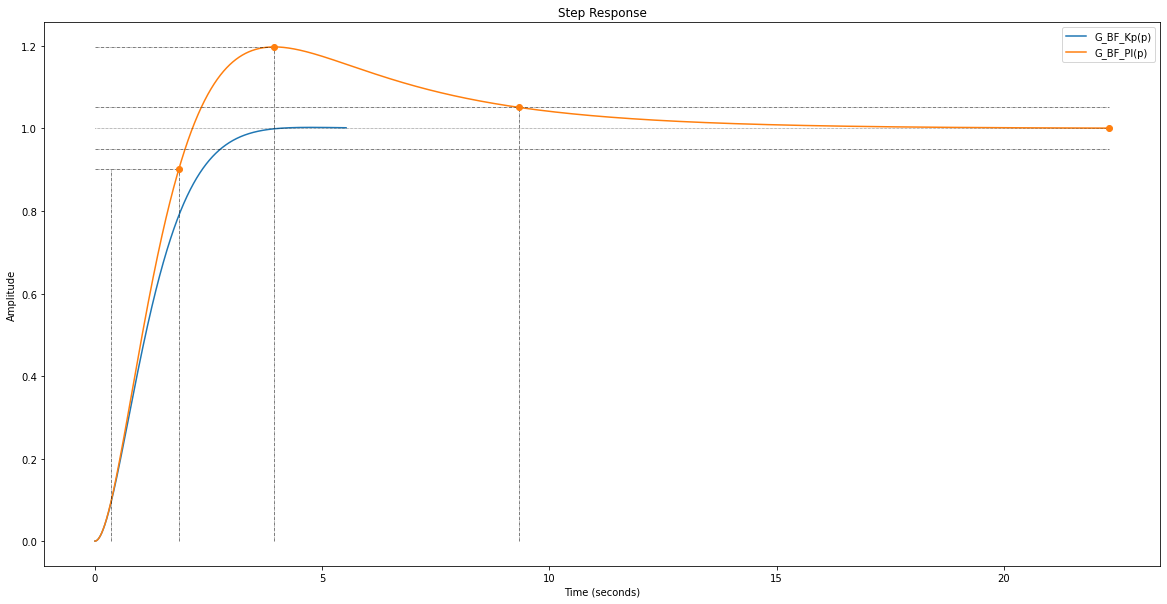

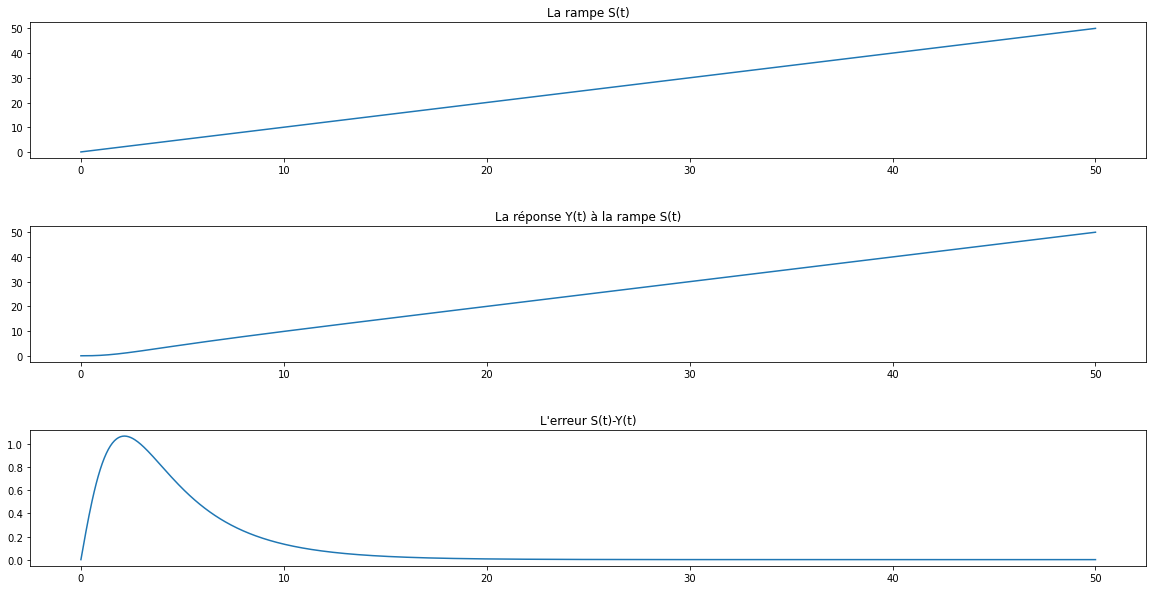

In [187]:
Kp = 2
MP = 85
fact = 700

# Lecture phase
mg, mp, __, __ = ml.margin(G_BO_K)
print(f"Si K = {Kp:.3f}, la marge de phase vaut {mp:.2f}°.")

fig = plt.figure("Bode",figsize=(20,10))
mag, w = rlf.getValues(G_BO_K, -180+MP-84, printValue=False, NameOfFigure="Bode")

tI = fact/w
print(f"Si nous cherchons à obtenir une marge de phase de {MP:.3f}°, nous relevons un w_c de {w:.3f} rad/s => tau_I = {tI:.3f}s (facteur multiplicatif d'1/w_c = {fact}).")
C_I = ml.tf([tI, 1],[tI, 0])

G_BO_PI = Kp*C_I*G_BO

# Nichols
fig = plt.figure("Nichols - Pôles dominants", figsize=(20,10))
frequencies = np.linspace(10**-5, 10**5, 10**6) # Pour bien voir vers où on converge dans les hautes fréquences (jusqu'à 10^5 rad/s ici)
rlf.nichols(G_BO, labels=['G_BO(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)
rlf.nichols(G_BO_PI, labels=['G_BO_PI(p)'], NameOfFigure = "Nichols - Pôles dominants", omega=frequencies)

# Réponse indicielle
G_BF_Kp = ml.feedback(Kp*G_BO, 1)
G_BF_PI = ml.feedback(G_BO_PI, 1)

fig = plt.figure("Steps - Pôles dominants", figsize=(20,10))
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
rlf.step_(G_BF_Kp, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_Kp(p)')
info_PI = rlf.stepWithInfo(G_BF_PI, NameOfFigure="Steps - Pôles dominants", sysName='G_BF_PI(p)')
warnings.filterwarnings('default') # Pour réactiver les warnings

# Pour vérifier que la marge de phase est bonne
mg, mp, __, __ = ml.margin(Kp*G_BO)
print(f"Marge de phase du système original corrigé avec K = {mp:.3f}°")
mg, mp, __, __ = ml.margin(G_BO_PI)
print(f"Marge de phase du système original corrigé par un correcteur PI = {mp:.3f}°")

# Dépassement
print(f"Dépassement du système original corrigé par un correcteur PI = {info_PI.Overshoot:.3f}%")



# Erreur de vitesse
t = np.linspace(0, 50, 1000)
s = t
warnings.filterwarnings('ignore') # Pour désactiver les warnings inutiles
[y, t, xout] = ml.lsim(G_BF_PI,s,t) # Simuler la réponse à une rampe => erreur de vitesse
warnings.filterwarnings('default') # Pour réactiver les warnings

plt.figure("Erreur de vitesse",figsize=(20,10))
plt.subplot(3,1,1); plt.plot(t,s); plt.title("La rampe S(t)")
plt.subplot(3,1,2); plt.plot(t,y); plt.title("La réponse Y(t) à la rampe S(t)")
plt.subplot(3,1,3); plt.plot(t,(s-y)); plt.title("L'erreur S(t)-Y(t)")
plt.subplots_adjust(hspace=0.5) # Pour laisser un peu d'espace pour les titres

ev = s[-1] - y[-1] # Erreur de vitesse système original

print(f"\nL'erreur de vitesse du système vaut {ev*100:.2f}%.")

### [Facultatif] Exercice 3 page 7-27

:::{warning}
Il y a une petite erreur dans le point 2 de la solution au niveau du terme indépendant au dénominateur qui devrait être égale à 1!
:::

### [Facultatif] Application 3  (cf. p. "application-4")

Effectuez la résolution par programmation Python.

### [Facultatif] Application 5 (cf. p. "application-8")
 
Effectuez la résolution par programmation Python.